In [ ]:
import pandas as pd

# Загрузить данные из файла
df = pd.read_csv("insurance.csv")

# Посмотреть статистику по данным с помощью метода describe()
data_description = df.describe()

data_description

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


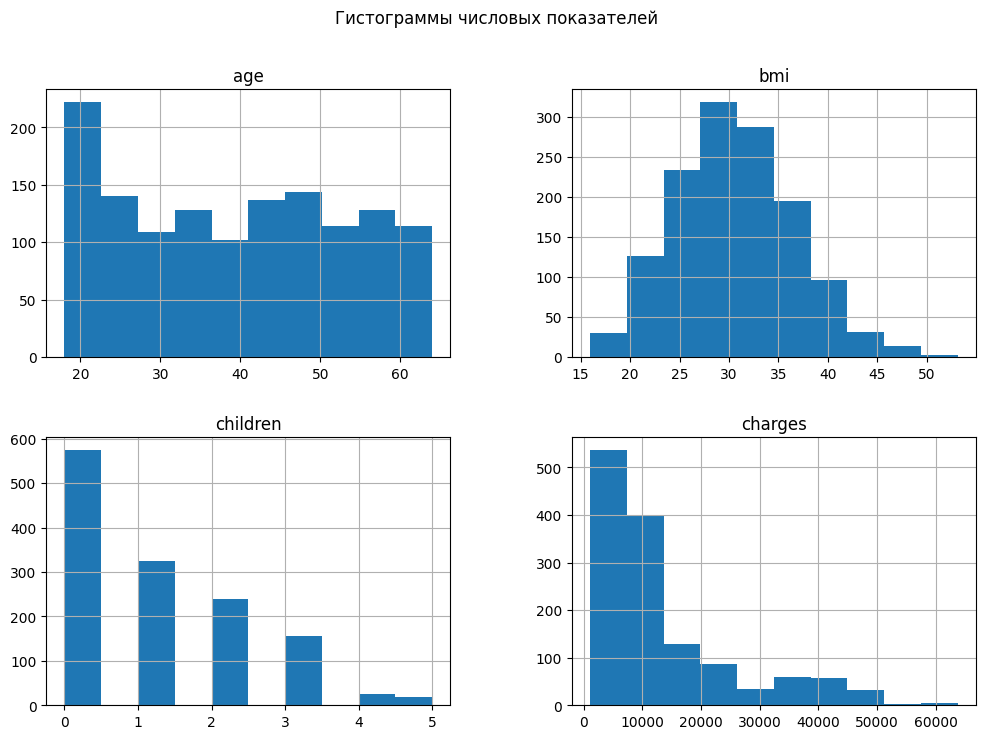

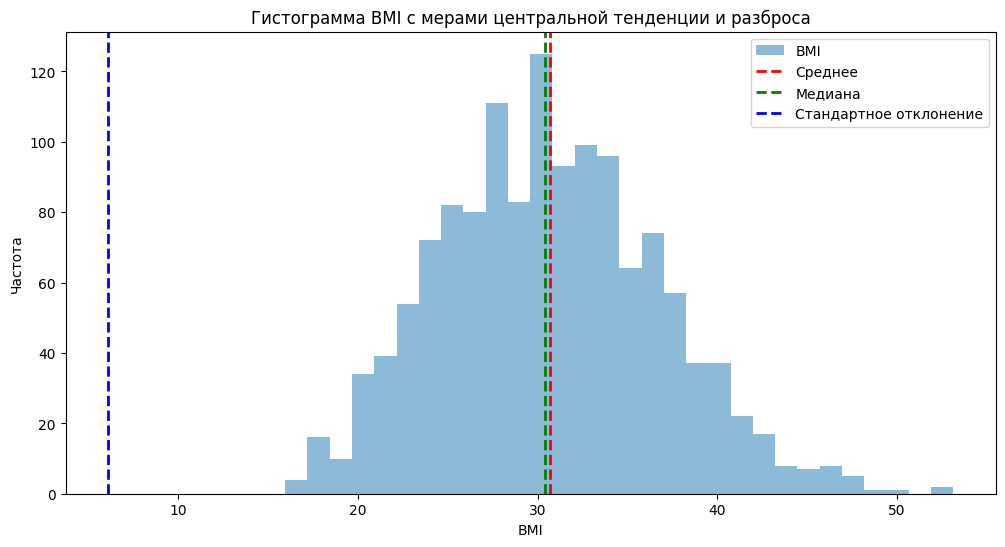

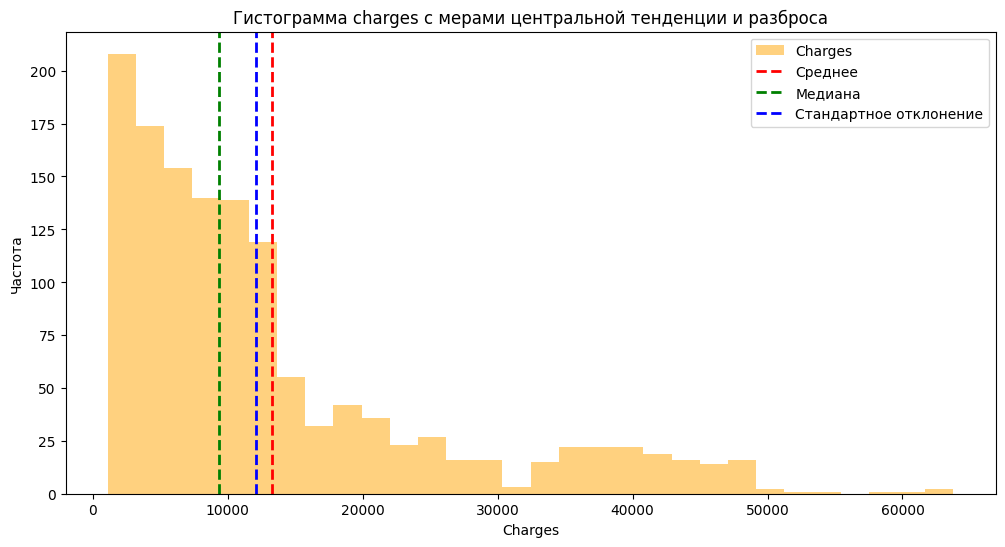

Для BMI:
Среднее: 30.66
Медиана: 30.40
Стандартное отклонение: 6.10
Минимум: 15.96
Максимум: 53.13

Для charges:
Среднее: 13270.42
Медиана: 9382.03
Стандартное отклонение: 12110.01
Минимум: 1121.87
Максимум: 63770.43


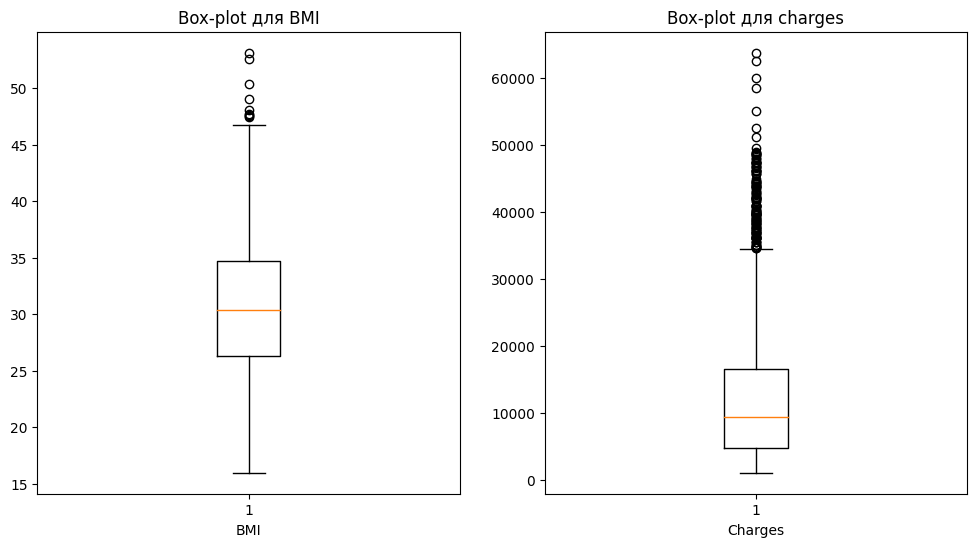

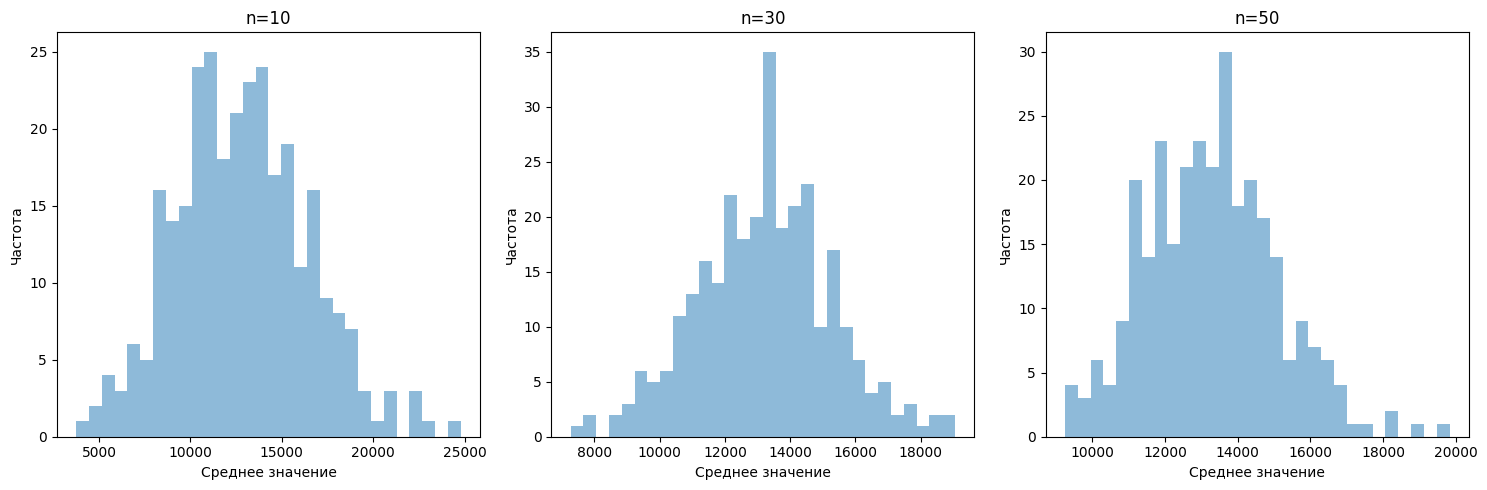

95% Доверительный интервал для среднего значения расходов: (12620.954034192644, 13919.890496089869)
99% Доверительный интервал для среднего значения расходов: (12416.429943203952, 14124.414587078561)
95% Доверительный интервал для среднего значения индекса массы тела: (30.336346903054107, 30.99044681891899)
99% Доверительный интервал для среднего значения индекса массы тела: (30.233355575431627, 31.09343814654147)


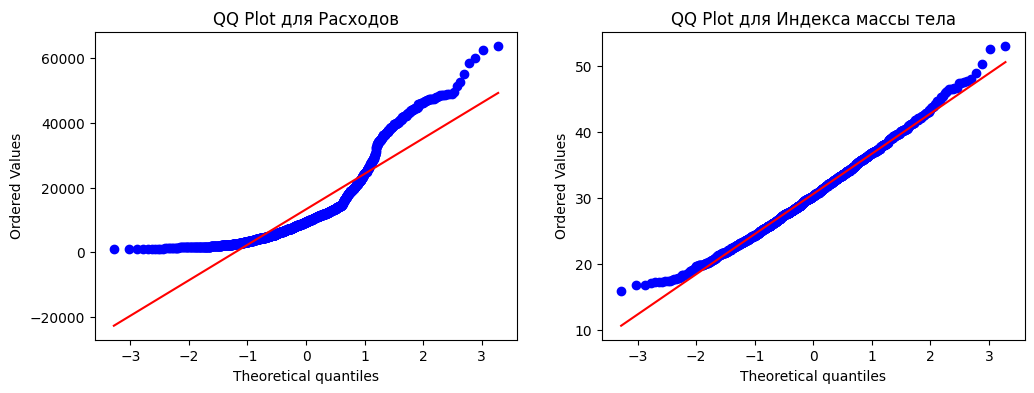

KS-тест для Расходов: p-value = 0.0
KS-тест для Индекса массы тела: p-value = 0.0


In [ ]:
import pandas as pd

# Загрузить данные из файла
df = pd.read_csv("insurance.csv")

import matplotlib.pyplot as plt

# Построить гистограммы для числовых столбцов
df.hist(bins=10, figsize=(12, 8))
plt.suptitle("Гистограммы числовых показателей")
plt.show()

# Найти меры центральной тенденции и меры разброса для BMI и charges
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()
bmi_std = df['bmi'].std()
bmi_min = df['bmi'].min()
bmi_max = df['bmi'].max()

charges_mean = df['charges'].mean()
charges_median = df['charges'].median()
charges_std = df['charges'].std()
charges_min = df['charges'].min()
charges_max = df['charges'].max()

# Построить гистограмму для BMI с вертикальными линиями
plt.figure(figsize=(12, 6))
plt.hist(df['bmi'], bins=30, alpha=0.5, label='BMI')
plt.axvline(bmi_mean, color='r', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(bmi_median, color='g', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(bmi_std, color='b', linestyle='dashed', linewidth=2, label='Стандартное отклонение')
plt.legend()
plt.title("Гистограмма BMI с мерами центральной тенденции и разброса")
plt.xlabel("BMI")
plt.ylabel("Частота")

# Построить гистограмму для charges с вертикальными линиями
plt.figure(figsize=(12, 6))
plt.hist(df['charges'], bins=30, alpha=0.5, label='Charges', color='orange')
plt.axvline(charges_mean, color='r', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(charges_median, color='g', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(charges_std, color='b', linestyle='dashed', linewidth=2, label='Стандартное отклонение')
plt.legend()
plt.title("Гистограмма charges с мерами центральной тенденции и разброса")
plt.xlabel("Charges")
plt.ylabel("Частота")

plt.show()

# Вывести меры центральной тенденции и разброса в текстовом виде
print("Для BMI:")
print(f"Среднее: {bmi_mean:.2f}")
print(f"Медиана: {bmi_median:.2f}")
print(f"Стандартное отклонение: {bmi_std:.2f}")
print(f"Минимум: {bmi_min:.2f}")
print(f"Максимум: {bmi_max:.2f}")

print("\nДля charges:")
print(f"Среднее: {charges_mean:.2f}")
print(f"Медиана: {charges_median:.2f}")
print(f"Стандартное отклонение: {charges_std:.2f}")
print(f"Минимум: {charges_min:.2f}")
print(f"Максимум: {charges_max:.2f}")

# Построить box-plot для числовых столбцов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['bmi'])
plt.title('Box-plot для BMI')
plt.xlabel('BMI')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Box-plot для charges')
plt.xlabel('Charges')

plt.show()

import numpy as np

# Количество выборок
num_samples = 300

# Размеры выборок (различные n)
sample_sizes = [10, 30, 50]

# Список для сохранения результатов
results = []

# Выполняем эксперимент для каждого размера выборки
for n in sample_sizes:
    sample_means = []
    for _ in range(num_samples):
        # Генерируем случайные выборки
        sample = np.random.choice(df['charges'], size=n, replace=True)
        # Вычисляем среднее значение выборки
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    results.append((n, sample_means))

# Выводим результаты в виде гистограмм
plt.figure(figsize=(15, 5))
for i, (n, sample_means) in enumerate(results):
    plt.subplot(1, 3, i + 1)
    plt.hist(sample_means, bins=30, alpha=0.5)
    plt.title(f'n={n}')
    plt.xlabel('Среднее значение')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

import scipy.stats as stats

# charges
confidence_95_expenditure = stats.t.interval(0.95, len(df['charges'])-1, loc=df['charges'].mean(), scale=stats.sem(df['charges']))
confidence_99_expenditure = stats.t.interval(0.99, len(df['charges'])-1, loc=df['charges'].mean(), scale=stats.sem(df['charges']))

# bmi
confidence_95_bmi = stats.t.interval(0.95, len(df['bmi'])-1, loc=df['bmi'].mean(), scale=stats.sem(df['bmi']))
confidence_99_bmi = stats.t.interval(0.99, len(df['bmi'])-1, loc=df['bmi'].mean(), scale=stats.sem(df['bmi']))

print(f'95% Доверительный интервал для среднего значения расходов: {confidence_95_expenditure}')
print(f'99% Доверительный интервал для среднего значения расходов: {confidence_99_expenditure}')
print(f'95% Доверительный интервал для среднего значения индекса массы тела: {confidence_95_bmi}')
print(f'99% Доверительный интервал для среднего значения индекса массы тела: {confidence_99_bmi}')

# KS-тест
ks_stat_expenditure, p_value_expenditure = stats.kstest(df['charges'], 'norm')
ks_stat_bmi, p_value_bmi = stats.kstest(df['bmi'], 'norm')

# QQ-графики
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title("QQ Plot для Расходов")

plt.subplot(1, 2, 2)
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title("QQ Plot для Индекса массы тела")

plt.show()

# Вывод результатов
print(f'KS-тест для Расходов: p-value = {p_value_expenditure}')
print(f'KS-тест для Индекса массы тела: p-value = {p_value_bmi}')

#Для нулевой гипотезы: Распределение данных соответствует нормальному распределению.
#Для альтернативной гипотезы: Распределение данных не соответствует нормальному распределению.

In [8]:
import pandas as pd

# Загрузить данные из файла
df = pd.read_csv("ECDCCases.csv")

# Посмотреть статистику по данным с помощью метода describe()
data_description = df.describe()

data_description

# Подсчет пропущенных значений
missing_values = df.isnull().sum()

# Подсчет пропущенных значений в процентах
total_cells = df.size
percentage_missing = (missing_values.sum() / total_cells) * 100

print(f"Количество пропущенных значений: {missing_values.sum()}")
print(f"Процент пропущенных значений: {percentage_missing:.2f}%")

# Удаление двух признаков с наибольшим количеством пропущенных значений
# Найдем признаки с наибольшим количеством пропущенных значений
n = 2  # Указываем количество признаков для удаления
columns_to_drop = df.isnull().sum().sort_values(ascending=False).head(n).index
df.drop(columns=columns_to_drop, inplace=True)

# Обработка оставшихся пропущенных значений
for column in df.columns:
    if df[column].dtype == 'object':
        # Для категориальных признаков используем "other" в качестве значения по умолчанию
        df[column].fillna("other", inplace=True)
    else:
        # Для числовых признаков используем медианное значение
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

# Проверка наличия пропусков
missing_values = df.isnull().sum().sum()

if missing_values == 0:
    print("Пропусков в данных больше нет.")
else:
    print(f"Пропусков в данных всё ещё есть: {missing_values} штук.")

# Анализ статистики данных
data_description = df.describe()

# Поиск выбросов: считаем значения, выходящие за пределы 1.5 межквартильных размахов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Вывод статистики и признаков с выбросами
print("Статистика данных:")
print(data_description)
print("\nПризнаки с выбросами:")
print(outliers[outliers > 0])

# Поиск дней, когда количество смертей в день превысило 3000
high_death_days = df[df["deaths"] > 3000]
print("\nДни с количеством смертей в день более 3000:")
print(high_death_days)

# Поиск количества дней для каждой страны, когда смертей в день было более 3000
countries_with_high_deaths = high_death_days["countriesAndTerritories"].value_counts()
print("\nКоличество таких дней для каждой страны:")
print(countries_with_high_deaths)

# Поиск дубликатов данных
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Найдены дубликаты данных:")
    print(duplicate_rows)

    # Удаление дубликатов
    df = df.drop_duplicates()

    print("\nДубликаты данных удалены.")
else:
    print("Дубликатов данных не найдено.")

Количество пропущенных значений: 3400
Процент пропущенных значений: 0.46%
Пропусков в данных больше нет.
Статистика данных:
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
7

<ipython-input-8-b30268981de5>:49: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-8-b30268981de5>:50: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-8-b30268981de5>:52: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Найдены дубликаты данных:
          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
3      12/12/2020   12     12  2020    113      11             Afghanistan   
218    12/05/2020   12      5  2020    285       2             Afghanistan   
48010  29/05/2020   29      5  2020      0       0             Saint_Lucia   
48073  28/03/2020   28      3  2020      0       0             Saint_Lucia   

      countryterritoryCode  popData2019 continentExp  
3                      AFG   38041757.0         Asia  
218                    AFG   38041757.0         Asia  
48010                  LCA     182795.0      America  
48073                  LCA     182795.0      America  

Дубликаты данных удалены.


In [10]:
import pandas as pd
from scipy import stats

# Загрузите данные из файла "bmi.csv"
df = pd.read_csv("bmi.csv")

# Разделите данные на две выборки: northwest и southwest
northwest_bmi = df[df['region'] == 'northwest']['bmi']
southwest_bmi = df[df['region'] == 'southwest']['bmi']

# Проверка нормальности распределения с помощью критерия Шапиро-Уилка
_, p_value_nw = stats.shapiro(northwest_bmi)
_, p_value_sw = stats.shapiro(southwest_bmi)

# Проверка гомогенности дисперсии с помощью критерия Бартлетта
_, p_value_bartlett = stats.bartlett(northwest_bmi, southwest_bmi)

if p_value_nw > 0.05 and p_value_sw > 0.05:
    print("Выборки northwest и southwest обе подчиняются нормальному распределению.")
    print("Проверка на гомогенность дисперсии (критерий Бартлетта):")
    if p_value_bartlett > 0.05:
        print("Дисперсии выборок однородны.")
    else:
        print("Дисперсии выборок неоднородны.")

    # Сравнение средних с использованием t-критерия Стьюдента
    t_statistic, p_value_ttest = stats.ttest_ind(northwest_bmi, southwest_bmi)

    if p_value_ttest < 0.05:
        print("Средние значения выборок различаются (p-value < 0.05).")
    else:
        print("Средние значения выборок не различаются (p-value > 0.05).")
else:
    print("Одна или обе выборки не подчиняются нормальному распределению. Невозможно выполнить t-критерий Стьюдента.")

Выборки northwest и southwest обе подчиняются нормальному распределению.
Проверка на гомогенность дисперсии (критерий Бартлетта):
Дисперсии выборок однородны.
Средние значения выборок различаются (p-value < 0.05).


In [12]:
import numpy as np
from scipy.stats import chisquare

# Фактическое количество выпадений
observed = np.array([97, 98, 109, 95, 97, 104])

# Ожидаемое равномерное распределение
expected = np.array([100, 100, 100, 100, 100, 100])

# Вычисляем критерий Хи-квадрат и p-value
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Значение критерия Хи-квадрат: {chi2}")
print(f"P-значение: {p}")

Значение критерия Хи-квадрат: 1.44
P-значение: 0.9198882077437889


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создаем датафрейм
data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})

data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

# Выполняем критерий Хи-квадрат
chi2, p, dof, expected = chi2_contingency(data)

print(f"Значение критерия Хи-квадрат: {chi2}")
print(f"P-значение: {p}")

Значение критерия Хи-квадрат: 122.29654948595365
P-значение: 1.7291616900960234e-21


Влияет Р ниже 0.05